### Instalação de bibliotecas com Pip

In [ ]:
! pip install -r requirements.txt

### Importação de Bibliotecas Python

In [75]:
from database.models import HistoricalOHLC
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import tools.tools as tools
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from mpl_finance import candlestick_ohlc 
import os

### Extração de Dados da API OHLC (Open, High, Low, Close) e Inserção no Banco

In [ ]:
today = date.today()
dt_format = "%Y-%m-%d"
date_5year = today - relativedelta(years=5)

os.system(f"python main.py -id 1 -start {date_5year.strftime(dt_format)} -end {today.strftime(dt_format)} -i 1d -c BRL")

### Extração dos Dados Formatados do Banco de Dados

In [101]:
today = date.today()
dt_format = "%Y-%m-%d"

date_1month = today - relativedelta(months=1)
date_5year = today - relativedelta(years=5)

historical = HistoricalOHLC()
graph_candle = await historical.read_with_filter(f'date between date("{date_1month.strftime(dt_format)}") and date("{today.strftime(dt_format)}")')
graph_all = await historical.read_with_filter(f'date between date("{date_5year.strftime(dt_format)}") and date("{today.strftime(dt_format)}")')


In [102]:
df_candle = pd.DataFrame(graph_candle)
df_candle = df_candle[[3,4,5,6,7]]
df_candle.rename({3: "Data", 4: "Preco_Abertura", 5: "Preco_Max", 6: "Preco_Min", 7: 'Preco_Fechamento'}, axis=1, inplace=True)
df_candle['Data'] = pd.to_datetime(df_candle['Data'])
df_candle['Data'] = df_candle['Data'].apply(date2num)

df_all = pd.DataFrame(graph_all)
df_all = df_all[[3,7]]
df_all.rename({3: "Data", 7: "Preco_Fechamento"}, axis=1, inplace=True)

### Gráficos/Plots

<Axes: title={'center': 'Histórico de Preços (BRL) do Bitcoin'}, xlabel='Data'>

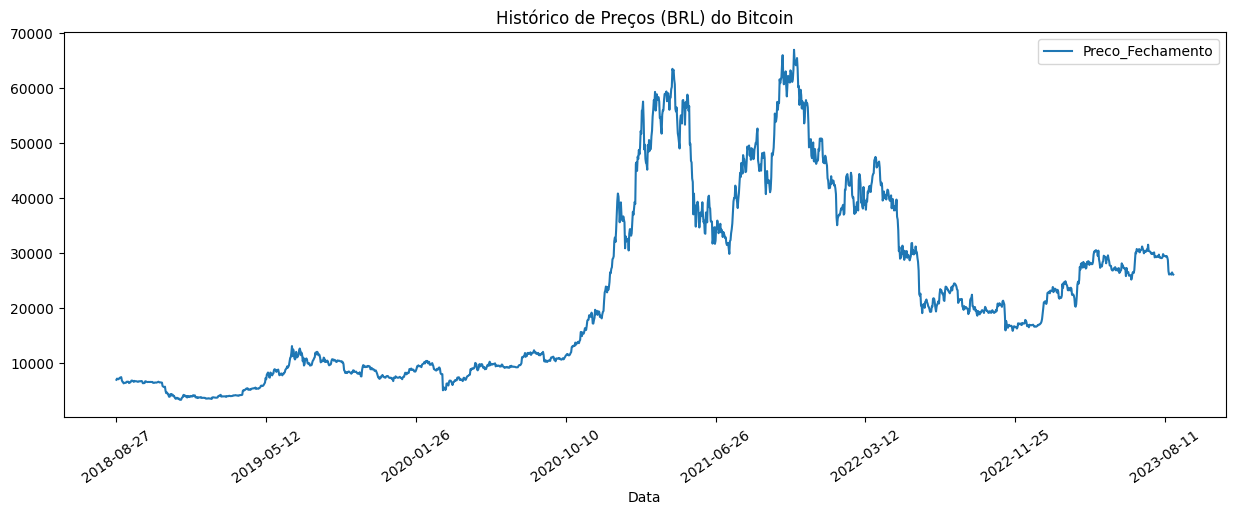

In [103]:
df_all.plot(x='Data' , y='Preco_Fechamento', figsize=(15,5), title="Histórico de Preços (BRL) do Bitcoin", rot=35.)

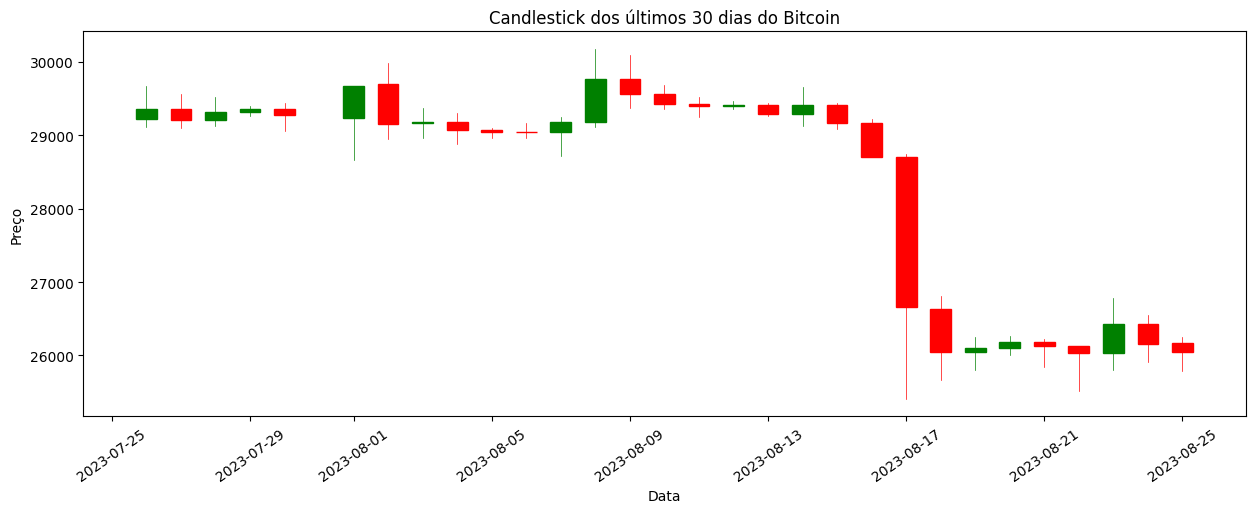

In [104]:
ohlc = df_candle[['Data', 'Preco_Abertura', 'Preco_Max', 'Preco_Min', 'Preco_Fechamento']].values

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()

plt.xticks(rotation=35)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Candlestick dos últimos 30 dias do Bitcoin')

plt.show()